In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from tqdm import tqdm

def data_scrape():
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.get('https://www.imdb.com/title/tt6208148/reviews/?ref_=tt_urv')
    driver.implicitly_wait(10)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight * 0.90);")
    time.sleep(2)
    try:
        load_more_button = WebDriverWait(driver, 5).until(
             EC.element_to_be_clickable((By.XPATH, "//button[.//span[@class='ipc-see-more__text' and text()='All']]"))
         )  
        driver.execute_script("arguments[0].click();", load_more_button)
        # load_more_button.click()
        time.sleep(2)
    
        # Reviews and Ratings
        all_reviews = []
        all_ratings = []

        last_height = driver.execute_script("return document.body.scrollHeight")
        
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            
        mains = driver.find_elements(By.CLASS_NAME, "ipc-list-card__content")  
    
        # return mains
        
        for main in tqdm(mains[:200]):
            # Review
            reviews = main.find_elements(By.CLASS_NAME, "ipc-html-content-inner-div")  
        
            if len(reviews) > 0:  
                ret = reviews[0].text.strip()  
            else: 
                ret = 'No review found'
        
            # Rating
            ratings = main.find_elements(By.CLASS_NAME, "sc-3e6f8aa9-4") 
        
            if len(ratings) > 0: 
                rat = ratings[0].text.strip()  
                value = rat.split('\n')[0]  
                value = f"{value}/10"  
            else: 
                value = '-/10'
        
            all_reviews.append(ret)
            all_ratings.append(value)
        
        
        imdb = {
            'Review': all_reviews,
            'Rating': all_ratings,
        }
        
        # CSV
        df = pd.DataFrame(imdb)
        df.index = df.index+1
        df.to_csv('imdb.csv', index=False)
        driver.quit()
        return df

        # return len(mains)
    except Exception:
         return False
        
    

data_scrape()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=134.0.6998.179)
Stacktrace:
	GetHandleVerifier [0x00F9C7F3+24435]
	(No symbol) [0x00F22074]
	(No symbol) [0x00DF06E3]
	(No symbol) [0x00DCF83E]
	(No symbol) [0x00E6455E]
	(No symbol) [0x00E7EB19]
	(No symbol) [0x00E5D5B6]
	(No symbol) [0x00E2C54F]
	(No symbol) [0x00E2D894]
	GetHandleVerifier [0x012A70A3+3213347]
	GetHandleVerifier [0x012BB0C9+3295305]
	GetHandleVerifier [0x012B558C+3271948]
	GetHandleVerifier [0x01037360+658144]
	(No symbol) [0x00F2B27D]
	(No symbol) [0x00F28208]
	(No symbol) [0x00F283A9]
	(No symbol) [0x00F1AAC0]
	BaseThreadInitThunk [0x766B5D49+25]
	RtlInitializeExceptionChain [0x7749CF0B+107]
	RtlGetAppContainerNamedObjectPath [0x7749CE91+561]


In [35]:
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [44]:
path = "C:/Users/tohyi/SEM 3/Imdb Review Analysis/Imdb-Review-Analysis/imdb.csv"
df = pd.read_csv(path)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
# df['0']
df['Review'].tolist()
data = df[:10]
# data
reviews = data['Review']
clean_reviews = []
sia = SentimentIntensityAnalyzer()

# text preprocessing
for rev in reviews:
    words = word_tokenize(rev)
    # normal = [word.lower() for i in reviews for word in i if word.isalpha()]
    normal = [w.lower() for w in words if w.isalpha()]
    letters = ' '.join(normal)
    letters = [lemmatizer.lemmatize(w) for w in letters]
    letters = ''.join(letters)
    # print(len(letters))
    letters = letters.split(' ')
    letters = [w for w in letters if w not in stop_words]
    letters = ' '.join(letters)
    clean_reviews.append(letters)
data['Cleaned_Review'] = clean_reviews

# sentiment analysis
clean_reviews = data['Cleaned_Review']
compounds = []
positives = []
negatives = []
neutrals = []
for r in clean_reviews:
    rev = sia.polarity_scores(r)
    compounds.append(rev['compound'])
    positives.append(rev['pos'])
    negatives.append(rev['neg'])
    neutrals.append(rev['neu'])
data['VADER_Compound'] = compounds
data['VADER_Positive'] = positives
data['VADER_Negative'] = negatives
data['VADER_Neutral'] = neutrals

data

C:\Users\tohyi\AppData\Local\Temp\ipykernel_20936\4094037904.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_Review'] = clean_reviews
C:\Users\tohyi\AppData\Local\Temp\ipykernel_20936\4094037904.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VADER_Compound'] = compounds
C:\Users\tohyi\AppData\Local\Temp\ipykernel_20936\4094037904.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Review,Rating,Cleaned_Review,VADER_Compound,VADER_Positive,VADER_Negative,VADER_Neutral
0,"As always, whenever there's a negative hype ar...",1/10,always whenever negative hype around movie min...,-0.4215,0.231,0.239,0.529
1,No review found,1/10,review found,0.0000,0.000,0.000,1.000
2,"Disney's latest live-action remake, Snow White...",1/10,disney latest remake snow white yet another at...,0.9794,0.226,0.139,0.635
3,Saw this at the cinema with my six-year-old da...,1/10,saw cinema daughter laughed scenes whispered b...,0.9623,0.253,0.107,0.640
4,Snow White remake set out to modernize the cla...,1/10,snow white remake set modernize classic fairy ...,0.3575,0.176,0.157,0.666
5,Disney's Snow White (2025) is yet another misg...,2/10,disney snow white yet another misguided attemp...,0.9797,0.227,0.126,0.648
6,Putting aside of all the political controversy...,2/10,putting aside political controversy discussion...,0.7872,0.203,0.158,0.640
7,This movie makes no sense. It is a complete di...,1/10,movie makes sense complete disaster upset cart...,-0.9230,0.154,0.293,0.554
8,This movie is perfect.\n\nIf you live out of y...,10/10,movie perfect live car looking dark temperatur...,0.9830,0.351,0.025,0.624
9,Does this film really deserve the wave of crit...,6/10,film really deserve wave criticism fallen best...,0.9856,0.285,0.140,0.574


In [52]:
pos_sen = data[data['VADER_Compound']>=0.5]
pos_sen

,Review,Rating,Cleaned_Review,VADER_Compound,VADER_Positive,VADER_Negative,VADER_Neutral
2,"Disney's latest live-action remake, Snow White...",1/10,disney latest remake snow white yet another at...,0.9794,0.226,0.139,0.635
3,Saw this at the cinema with my six-year-old da...,1/10,saw cinema daughter laughed scenes whispered b...,0.9623,0.253,0.107,0.640
5,Disney's Snow White (2025) is yet another misg...,2/10,disney snow white yet another misguided attemp...,0.9797,0.227,0.126,0.648
6,Putting aside of all the political controversy...,2/10,putting aside political controversy discussion...,0.7872,0.203,0.158,0.640
8,This movie is perfect.\n\nIf you live out of y...,10/10,movie perfect live car looking dark temperatur...,0.9830,0.351,0.025,0.624
9,Does this film really deserve the wave of crit...,6/10,film really deserve wave criticism fallen best...,0.9856,0.285,0.140,0.574


In [51]:
neg_sen = data[data['VADER_Compound']<= -0.5]
neg_sen

,Review,Rating,Cleaned_Review,VADER_Compound,VADER_Positive,VADER_Negative,VADER_Neutral
7,This movie makes no sense. It is a complete di...,1/10,movie makes sense complete disaster upset cart...,-0.923,0.154,0.293,0.554


In [49]:
neu_sen = data[(data['VADER_Compound'] > -0.5) & (data['VADER_Compound'] < 0.5)]
neu_sen

,Review,Rating,Cleaned_Review,VADER_Compound,VADER_Positive,VADER_Negative,VADER_Neutral
0,"As always, whenever there's a negative hype ar...",1/10,always whenever negative hype around movie min...,-0.4215,0.231,0.239,0.529
1,No review found,1/10,review found,0.0000,0.000,0.000,1.000
4,Snow White remake set out to modernize the cla...,1/10,snow white remake set modernize classic fairy ...,0.3575,0.176,0.157,0.666


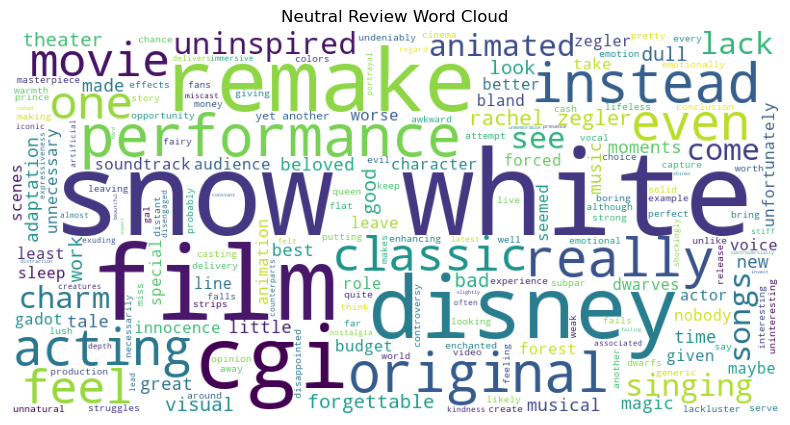

In [54]:
text = pos_sen['Cleaned_Review']
text = text.tolist()
text = ' '.join(text)
wc = WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.title('Neutral Review Word Cloud')
plt.show()